In [721]:
import torch
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

sub_PassengerId = test['PassengerId'].values


In [722]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [723]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [724]:
train.shape


(891, 12)

In [725]:
test.shape

(418, 11)

In [726]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [727]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [728]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [729]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [730]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [731]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead=train[train['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(5,4))

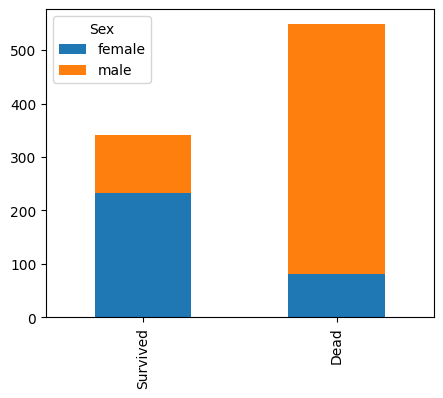

In [732]:
bar_chart("Sex")

**Feature Engineering**


**Name**

In [733]:
train_test_data=[train,test]
for dataset in train_test_data:
    dataset['Title']=dataset['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)
train['Title'].value_counts()

<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
/var/folders/cw/vt8hfg517qdbsjnsm_6vtgt40000gn/T/ipykernel_2766/254496681.py:3: SyntaxWarning: invalid escape sequence '\.'
  dataset['Title']=dataset['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [734]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)


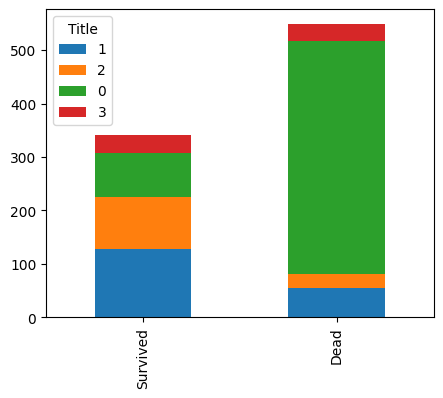

In [735]:
bar_chart('Title')

In [736]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

**Sex**

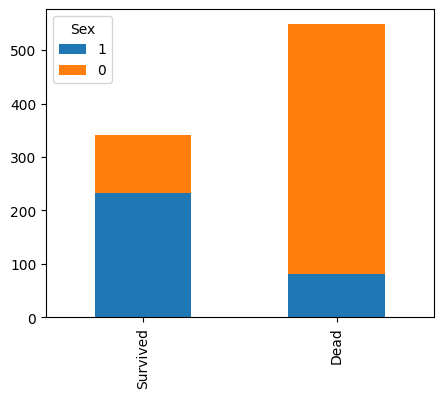

In [737]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)
bar_chart('Sex')

**Age**

In [738]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)
train.head(30)

/var/folders/cw/vt8hfg517qdbsjnsm_6vtgt40000gn/T/ipykernel_2766/743031990.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
/var/folders/cw/vt8hfg517qdbsjnsm_6vtgt40000gn/T/ipykernel_2766/743031990.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,30.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


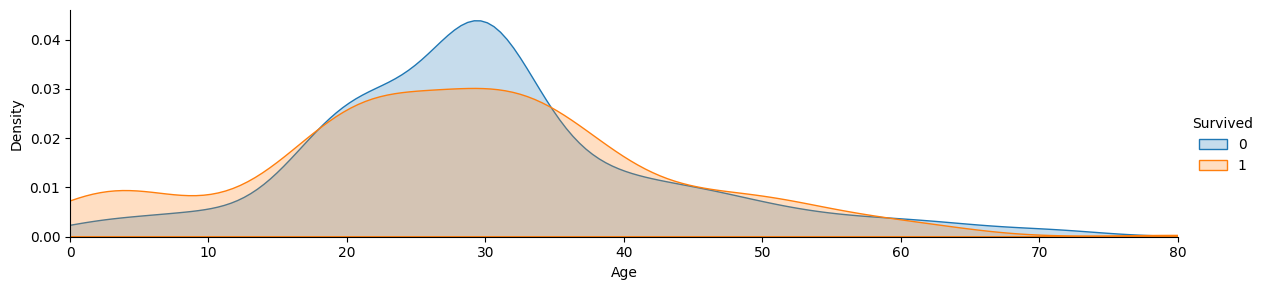

In [739]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.show() 

(30.0, 40.0)

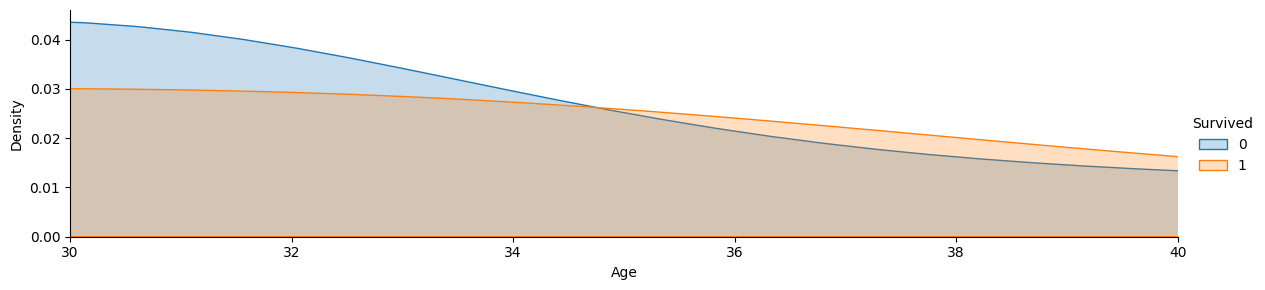

In [740]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(30,40)

In [741]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [742]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


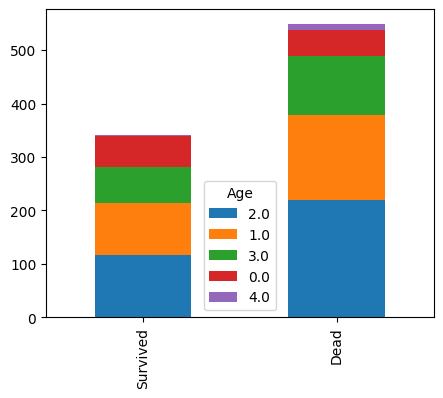

In [743]:
bar_chart('Age')

**Embarked**

<Axes: >

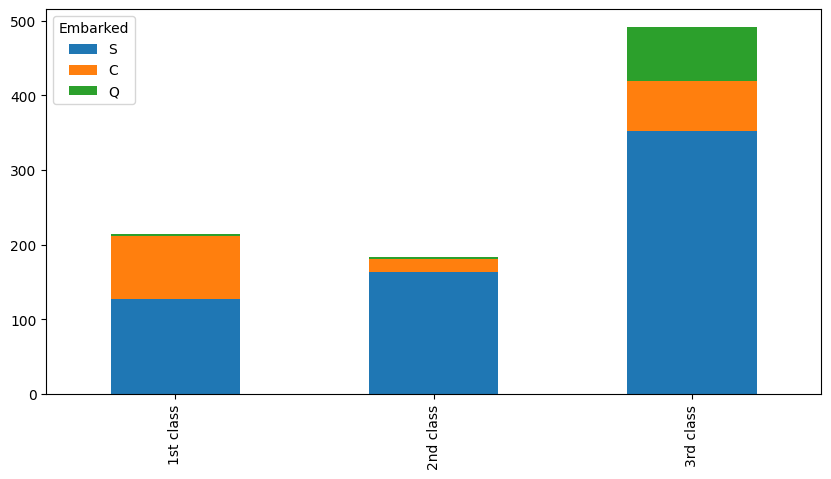

In [744]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [745]:
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].fillna('S')


In [746]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

**Fare**

In [747]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(50)

/var/folders/cw/vt8hfg517qdbsjnsm_6vtgt40000gn/T/ipykernel_2766/739470797.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
/var/folders/cw/vt8hfg517qdbsjnsm_6vtgt40000gn/T/ipykernel_2766/739470797.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,2


/Users/hyunwook/Desktop/AIstudy/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/hyunwook/Desktop/AIstudy/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


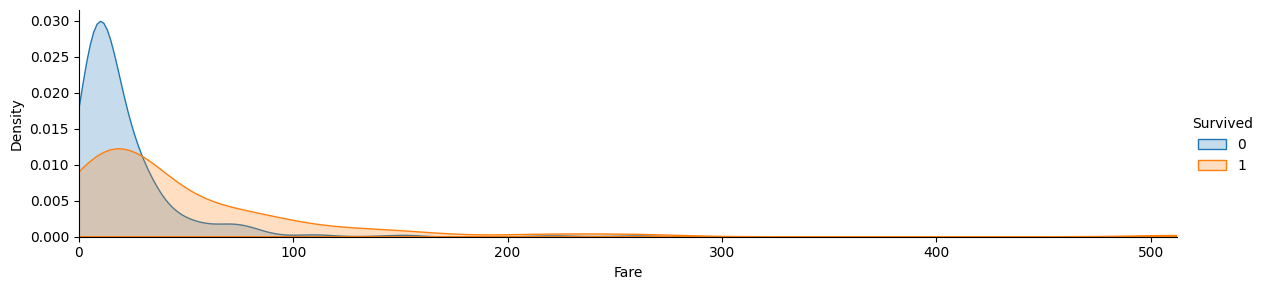

In [748]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()  

/Users/hyunwook/Desktop/AIstudy/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/hyunwook/Desktop/AIstudy/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(30.0, 100.0)

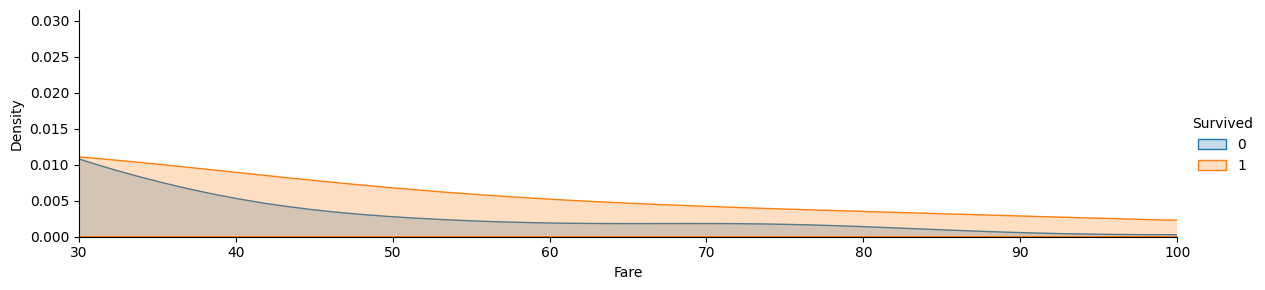

In [749]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.xlim(30,100)  

In [750]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

**Cabin**

In [751]:
train.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

<Axes: >

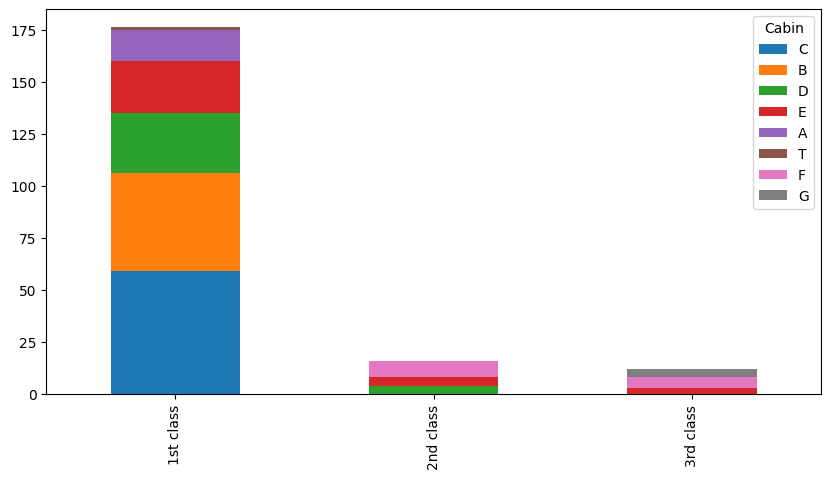

In [752]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [753]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)
train['Cabin']=train['Cabin'].fillna(train.groupby("Pclass")["Cabin"].transform("median"))
test['Cabin']=test['Cabin'].fillna(train.groupby("Pclass")["Cabin"].transform("median"))

**FamilySize**

(0.0, 11.0)

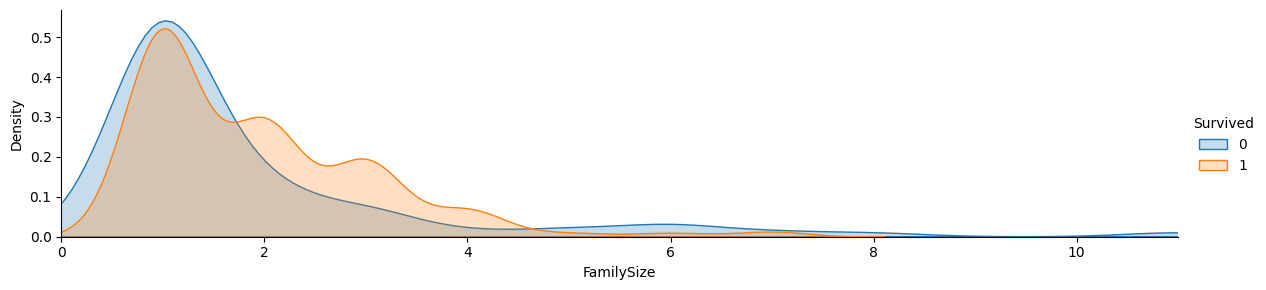

In [754]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',fill= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [755]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [756]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)
test = test.drop(['PassengerId'], axis=1)

In [757]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']
print(test.head)
print(train_data.head)

train_data.shape, target.shape

<bound method NDFrame.head of      Pclass  Sex  Age  Fare  Cabin  Embarked  Title  FamilySize
0         3    0  2.0   0.0    2.0         2      0         0.0
1         3    1  3.0   0.0    0.8         0      2         0.4
2         2    0  3.0   0.0    2.0         2      0         0.0
3         3    0  2.0   0.0    0.8         0      0         0.0
4         3    1  1.0   0.0    2.0         0      2         0.8
..      ...  ...  ...   ...    ...       ...    ...         ...
413       3    0  2.0   0.0    1.8         0      0         0.0
414       1    1  3.0   3.0    0.8         1      3         0.0
415       3    0  3.0   0.0    2.0         0      0         0.0
416       3    0  2.0   0.0    1.8         0      0         0.0
417       3    0  0.0   1.0    1.8         1      3         0.8

[418 rows x 8 columns]>
<bound method NDFrame.head of      Pclass  Sex  Age  Fare  Cabin  Embarked  Title  FamilySize
0         3    0  1.0   0.0    2.0         0      0         0.4
1         1    1  3

((891, 8), (891,))

In [758]:
train_data.head(10)
type(train_data)
x_train=train_data.values
x_train=torch.FloatTensor(x_train)
y_train=target.values
y_train=torch.FloatTensor(y_train)
x_test=test.values
x_test=torch.FloatTensor(x_test)

print(x_test)
print(x_train)
print(len(x_train))
print(x_train.shape)

tensor([[3.0000, 0.0000, 2.0000,  ..., 2.0000, 0.0000, 0.0000],
        [3.0000, 1.0000, 3.0000,  ..., 0.0000, 2.0000, 0.4000],
        [2.0000, 0.0000, 3.0000,  ..., 2.0000, 0.0000, 0.0000],
        ...,
        [3.0000, 0.0000, 3.0000,  ..., 0.0000, 0.0000, 0.0000],
        [3.0000, 0.0000, 2.0000,  ..., 0.0000, 0.0000, 0.0000],
        [3.0000, 0.0000, 0.0000,  ..., 1.0000, 3.0000, 0.8000]])
tensor([[3.0000, 0.0000, 1.0000,  ..., 0.0000, 0.0000, 0.4000],
        [1.0000, 1.0000, 3.0000,  ..., 1.0000, 2.0000, 0.4000],
        [3.0000, 1.0000, 1.0000,  ..., 0.0000, 1.0000, 0.0000],
        ...,
        [3.0000, 1.0000, 1.0000,  ..., 0.0000, 1.0000, 1.2000],
        [1.0000, 0.0000, 1.0000,  ..., 1.0000, 0.0000, 0.0000],
        [3.0000, 0.0000, 2.0000,  ..., 2.0000, 0.0000, 0.0000]])
891
torch.Size([891, 8])


**Modeling**

In [759]:
class NN(nn.Module):
    def __init__(self):
        super(NN,self).__init__()
        self.layer1=nn.Sequential(
            nn.Linear(8,256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256,256),
            nn.Dropout(0.2),
            nn.ReLU(),
            nn.Linear(256,2)
        )
    def forward(self,x):
        x=self.layer1(x)
        return x

In [760]:
learning_rate=1E-2
#batch_size=len(y_train)
model=NN()
optim=torch.optim.Adam(model.parameters(),lr=learning_rate)
loss_fn=nn.CrossEntropyLoss()
epoch=500
train_loss_min = 1E+9

dataset = TensorDataset(x_train, y_train)
dataloader=DataLoader(dataset,batch_size=64,shuffle=True)

for epoch_cnt in range(epoch):
    num_right=0
    train_loss=0
    for index, (data,ans) in enumerate(dataloader):
        optim.zero_grad()
        prediction=model(data)
        loss=loss_fn(prediction,ans.long())
        loss.backward()
        optim.step()
        labels=torch.argmax(prediction,dim=1)
        num_right+=torch.sum(labels==ans)
        train_loss+=loss.item()*len(data)
    train_loss=train_loss/len(x_train)
    if(epoch_cnt+1)%10==0:
        print('Epoch {}/{}, Prediction : {}/{}, Cost: {}'.format(epoch_cnt+1,epoch,num_right,len(x_train),train_loss))
    if(train_loss<train_loss_min):
        print('=*=*=*= Loss decreased ({:6f} ===> {:6f}). Saving the model! =*=*=*='.format(train_loss_min, train_loss))
        torch.save(model.state_dict(), 'model.pt')
        train_loss_min = train_loss

=*=*=*= Loss decreased (1000000000.000000 ===> 0.633123). Saving the model! =*=*=*=
=*=*=*= Loss decreased (0.633123 ===> 0.450760). Saving the model! =*=*=*=
=*=*=*= Loss decreased (0.450760 ===> 0.446573). Saving the model! =*=*=*=


=*=*=*= Loss decreased (0.446573 ===> 0.415922). Saving the model! =*=*=*=
=*=*=*= Loss decreased (0.415922 ===> 0.409723). Saving the model! =*=*=*=
=*=*=*= Loss decreased (0.409723 ===> 0.402731). Saving the model! =*=*=*=
=*=*=*= Loss decreased (0.402731 ===> 0.400980). Saving the model! =*=*=*=
=*=*=*= Loss decreased (0.400980 ===> 0.395045). Saving the model! =*=*=*=
Epoch 10/500, Prediction : 759/891, Cost: 0.3953453333155742
=*=*=*= Loss decreased (0.395045 ===> 0.390918). Saving the model! =*=*=*=
=*=*=*= Loss decreased (0.390918 ===> 0.386924). Saving the model! =*=*=*=
=*=*=*= Loss decreased (0.386924 ===> 0.386893). Saving the model! =*=*=*=
=*=*=*= Loss decreased (0.386893 ===> 0.380317). Saving the model! =*=*=*=
Epoch 20/500, Prediction : 756/891, Cost: 0.3802232180714741
=*=*=*= Loss decreased (0.380317 ===> 0.380223). Saving the model! =*=*=*=
=*=*=*= Loss decreased (0.380223 ===> 0.365958). Saving the model! =*=*=*=
=*=*=*= Loss decreased (0.365958 ===> 0.364635). Savi

**Prediction**

In [761]:
with torch.no_grad():
    result=model(x_test)
labels=torch.argmax(result,dim=1)
survived=labels.numpy()
print(survived)

[0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0
 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 1 0 0 1]


In [762]:
submission = pd.DataFrame({'PassengerId': sub_PassengerId, 'Survived': survived})
submission.to_csv('submission.csv', index=False)